In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")
#print(plt.style.available)
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

In [2]:
trainDF = pd.read_csv("Titanic-Dataset.csv")
print(trainDF.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [3]:
trainDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
trainDF.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
def bar_plot(variable):
    """
    input: variable ex:"Sex"
    output: bar plot & value count
    """
    # get feature
    var = trainDF[variable]
    # count nuber of categorical variable(value/sample)
    varvalue = var.value_counts()

    # virtualize
    plt.figure(figsize=(9,3))
    plt.bar(varvalue.index,varvalue)
    plt.xticks(varvalue.index,varvalue.index.values)
    plt.ylabel("frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varvalue))

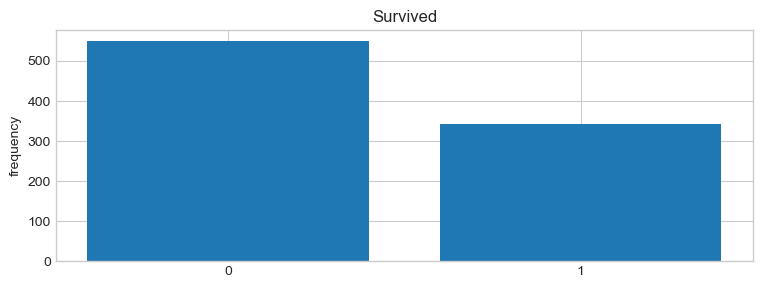

Survived: 
 Survived
0    549
1    342
Name: count, dtype: int64


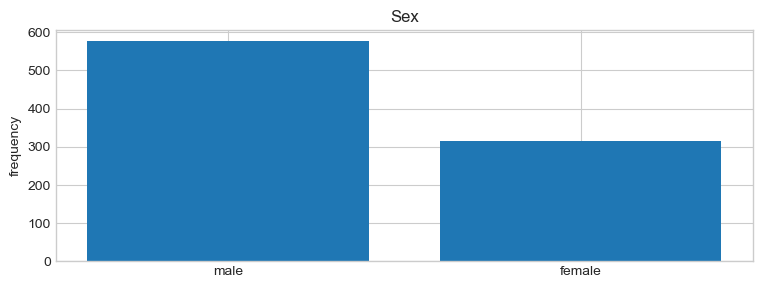

Sex: 
 Sex
male      577
female    314
Name: count, dtype: int64


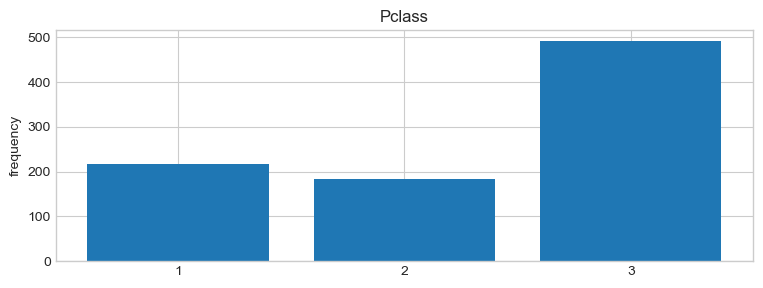

Pclass: 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


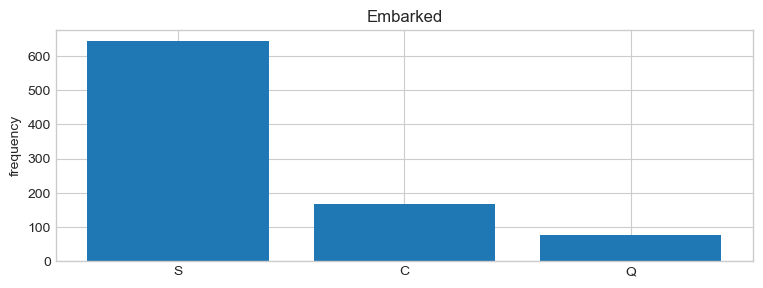

Embarked: 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


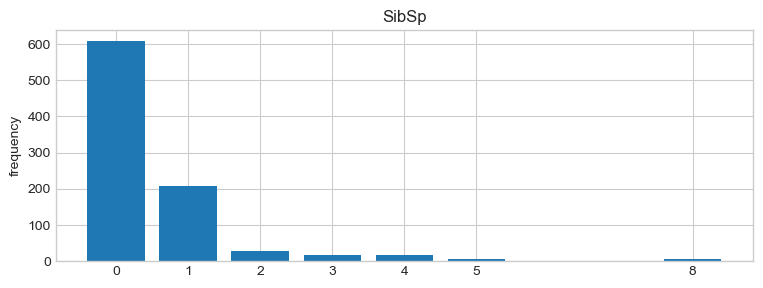

SibSp: 
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


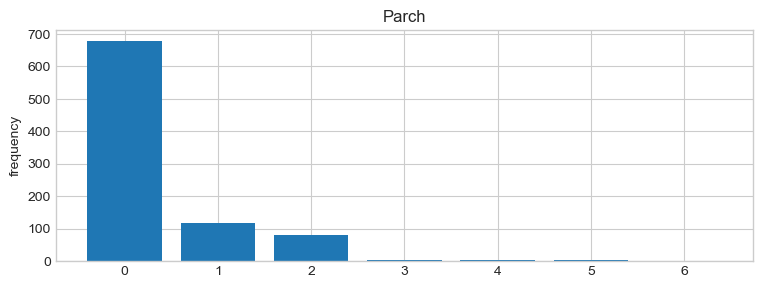

Parch: 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [7]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for c in category1:
    bar_plot(c)

In [8]:
category2 = ["Cabin","Name","Ticket"]
for c in category2:
    print("{} \n".format(trainDF[c].value_counts()))

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64 

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64 

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64 



In [9]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(trainDF[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

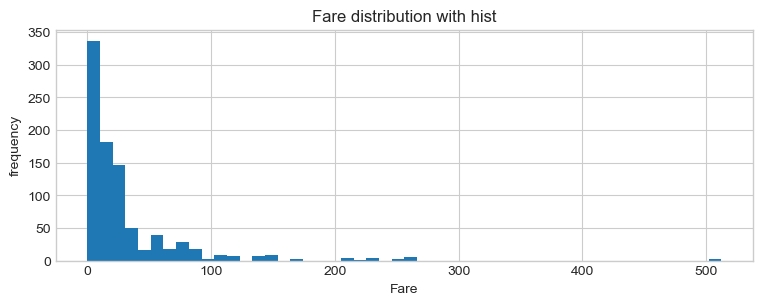

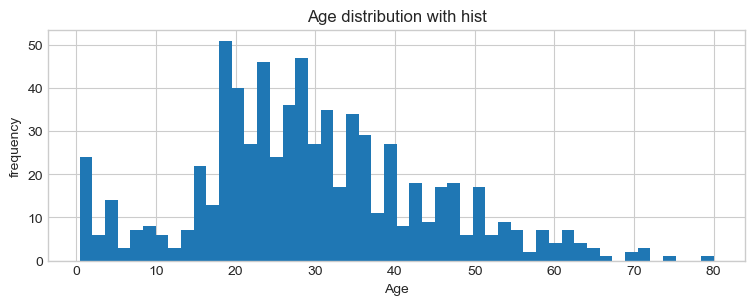

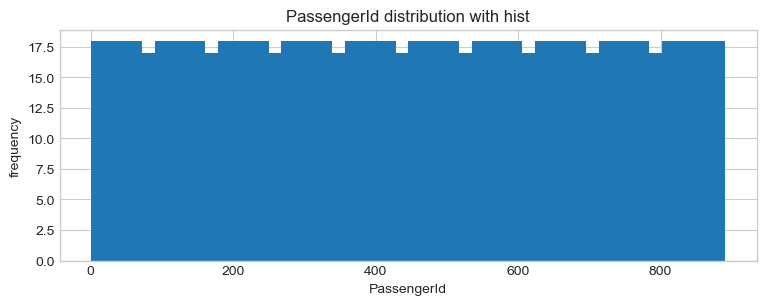

In [10]:
numericvar = ["Fare","Age","PassengerId"]
for n in numericvar:
    plot_hist(n)

In [11]:
# pclass vs survived
trainDF[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
# Sex vs survived
trainDF[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
# Sibsp vs survived
trainDF[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
# Parch vs survived
trainDF[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [15]:
def detect_outliers(df,features):
    outlier_indices=[]
    for c in features:
        # 1st quartile
        q1=np.percentile(df[c],25)
        # 3rd quartile
        q3=np.percentile(df[c],75)
        # Veri degerleri parcalandı ve parcalar icin ortalama degerler alindi
        # IQR
        IQR=q3-q1
        # outlier step
        outlier_step=IQR*1.5
        # detect outlier and their indeces
        outlier_list_col=df[(df[c]<q1-outlier_step)|(df[c]>q3+outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    outlier_indices=Counter(outlier_indices)
    multiple_outliers=list(i for i, v in outlier_indices.items()if v>2)
    return multiple_outliers

In [16]:
trainDF.loc[detect_outliers(trainDF,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [17]:
# Drop outliers 
trainDF = trainDF.drop(detect_outliers(trainDF,["Age","SibSp","Parch","Fare"]),axis=0).reset_index(drop=True)

In [18]:
trainDF_len = len(trainDF)

In [19]:
trainDF.columns[trainDF.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [20]:
trainDF.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [21]:
trainDF[trainDF["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


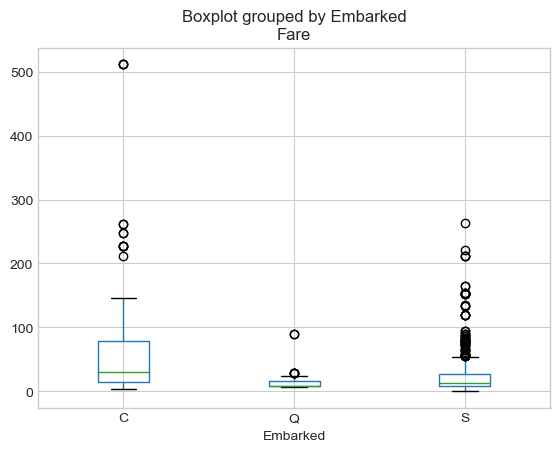

In [22]:
trainDF.boxplot(column="Fare",by="Embarked")
plt.show()

In [23]:
trainDF["Embarked"]=trainDF["Embarked"].fillna('C')
trainDF[trainDF['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [24]:
trainDF[trainDF["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [25]:
trainDF["Fare"]=trainDF["Fare"].fillna(np.mean(trainDF[trainDF["Pclass"]==3]["Fare"]))

In [26]:
trainDF[trainDF["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


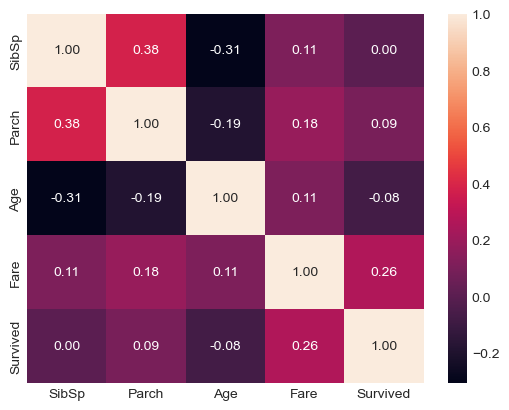

In [27]:
# Visualization
list1=["SibSp","Parch","Age","Fare","Survived"]
sns.heatmap(trainDF[list1].corr(),annot=True,fmt='.2f')
plt.show()

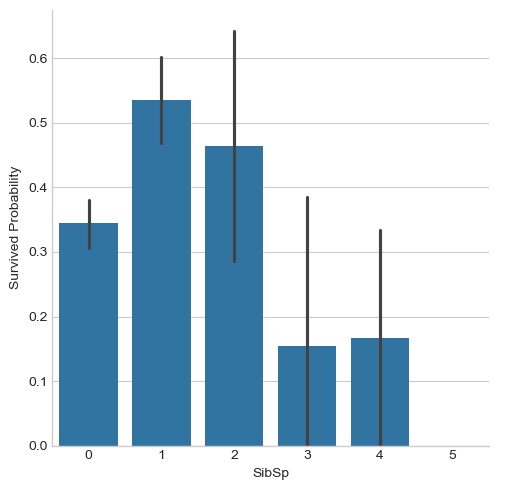

In [28]:
# SibSp / Survived
g1 = sns.catplot(x='SibSp',y='Survived',data=trainDF,kind='bar')
g1.set_ylabels('Survived Probability')
plt.show()

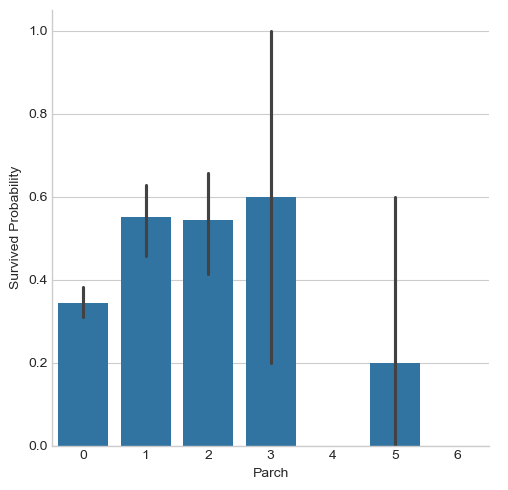

In [29]:
# Parch / Survived
g1 = sns.catplot(x='Parch',y='Survived',data=trainDF,kind='bar')
g1.set_ylabels('Survived Probability')
plt.show()

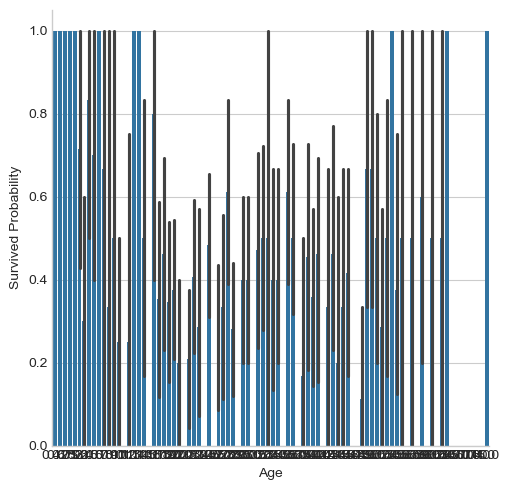

In [30]:
# Age / Survived
g1 = sns.catplot(x='Age',y='Survived',data=trainDF,kind='bar')
g1.set_ylabels('Survived Probability')
plt.show()

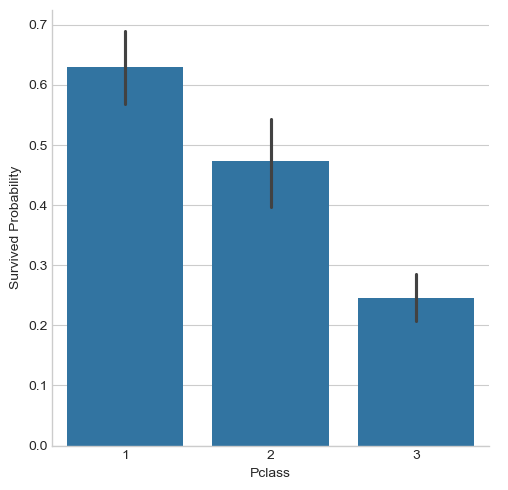

In [31]:
# Pclass / Survived
g1 = sns.catplot(x='Pclass',y='Survived',data=trainDF,kind='bar')
g1.set_ylabels('Survived Probability')
plt.show()

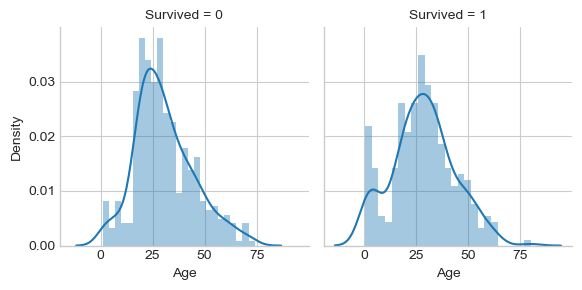

In [32]:
# Age / Survived
g1 = sns.FacetGrid(trainDF,col='Survived')
g1.map(sns.distplot,'Age',bins=25)
plt.show()

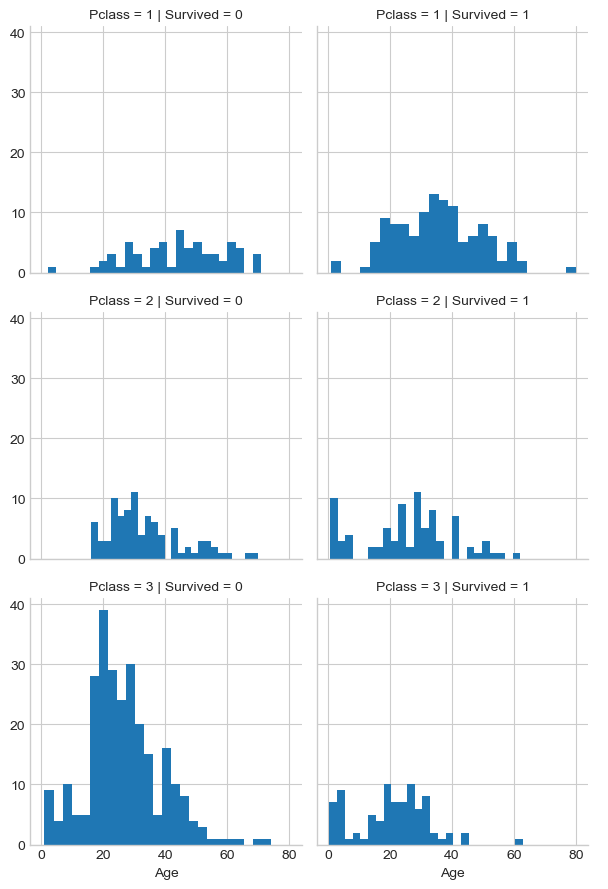

In [33]:
# Pclass-Survived-Age
g1 = sns.FacetGrid(trainDF,col='Survived',row='Pclass')
g1.map(plt.hist,'Age',bins=25)
g1.add_legend()
plt.show()

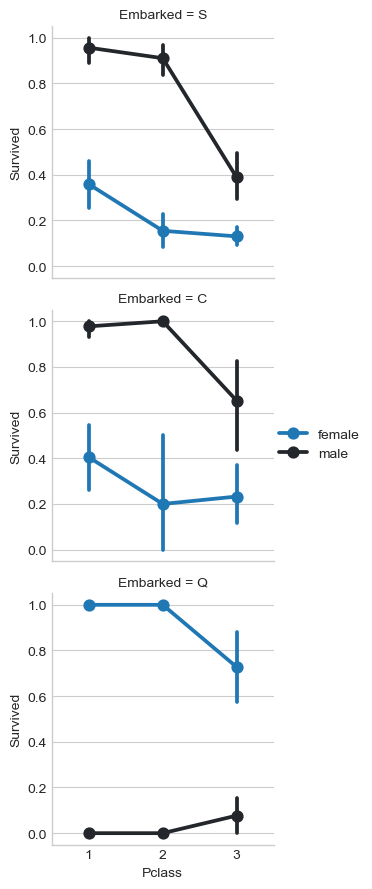

In [34]:
g1 = sns.FacetGrid(trainDF,row='Embarked')
g1.map(sns.pointplot,'Pclass','Survived','Sex')
g1.add_legend()
plt.show()

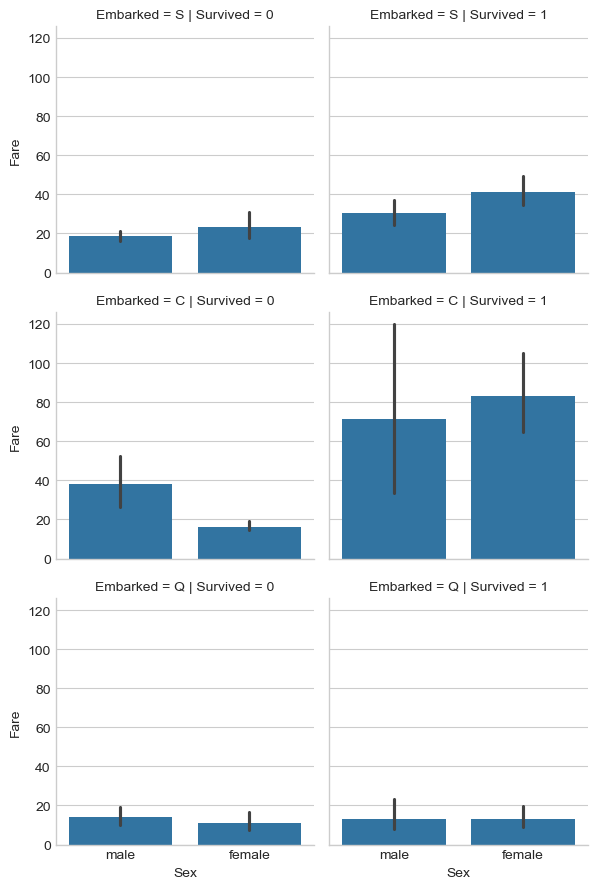

In [35]:
# Embarked-Sex-Fare-Survived
g1=sns.FacetGrid(trainDF,row='Embarked',col='Survived')
g1.map(sns.barplot,'Sex','Fare')
g1.add_legend()
plt.show()

In [36]:
trainDF[trainDF['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
840,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
850,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
858,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
868,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


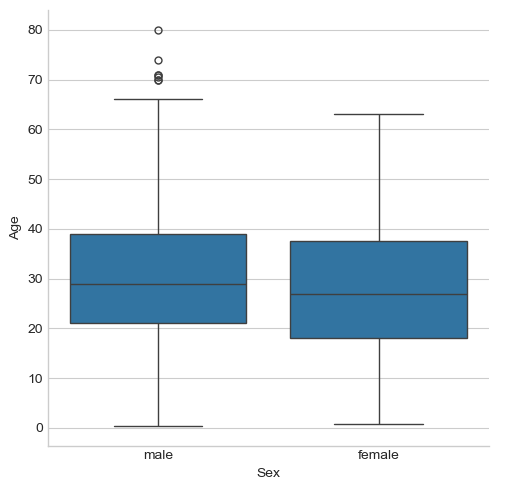

In [37]:
sns.catplot(x='Sex',y='Age',data=trainDF,kind='box')
plt.show()

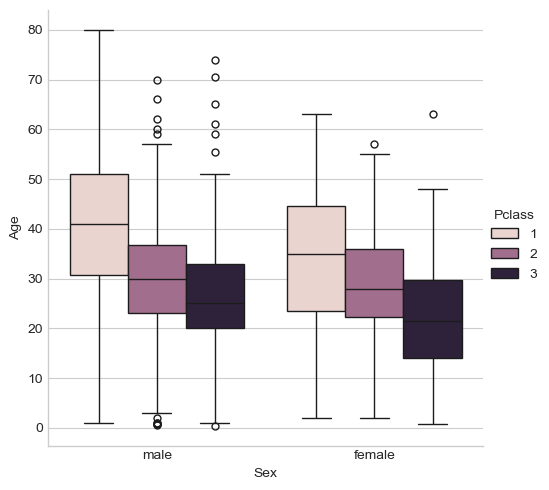

In [38]:
sns.catplot(x='Sex',y='Age',hue='Pclass',data=trainDF,kind='box')
plt.show()

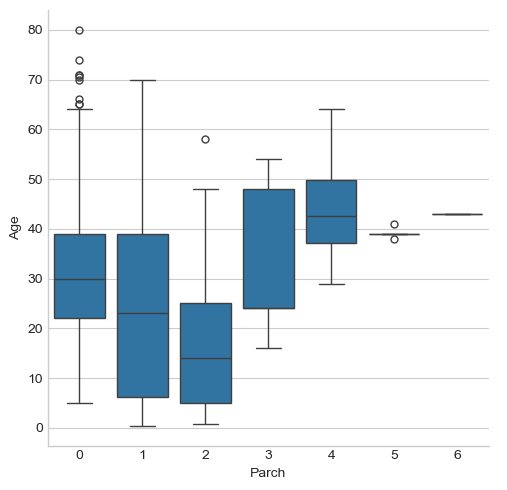

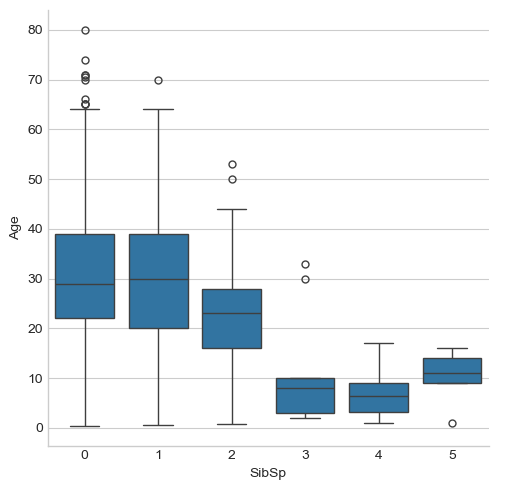

In [39]:
sns.catplot(x='Parch',y='Age',data=trainDF,kind='box')
sns.catplot(x='SibSp',y='Age',data=trainDF,kind='box')
plt.show()

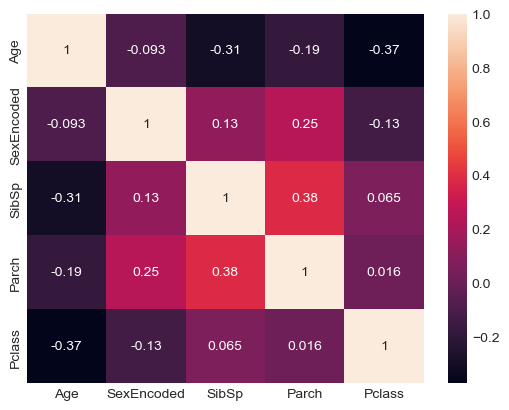

In [40]:
trainDF['SexEncoded']=trainDF['Sex'].map({'male':0,'female':1})
sns.heatmap(trainDF[['Age','SexEncoded','SibSp','Parch','Pclass']].corr(),annot=True)
plt.show()

In [41]:
index_nan_age=list(trainDF['Age'][trainDF['Age'].isnull()].index)
for i in index_nan_age:
    age_pred=trainDF['Age'][((trainDF['SibSp']== trainDF.iloc[i]['SibSp'])&(trainDF['Parch']==trainDF.iloc[i]['Parch'])&(trainDF['Pclass']==trainDF.iloc[i]['Pclass']))].median()
    age_med=trainDF['Age'].median()
    if not np.isnan(age_pred):
        trainDF['Age'].iloc[i]=age_pred
    else:
        trainDF['Age'].iloc[i]=age_med

In [42]:
trainDF[trainDF['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexEncoded


In [43]:
trainDF['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [44]:
names = trainDF['Name']
trainDF['Title']=[i.split('.')[0].split(',')[-1].strip() for i in names]

In [45]:
trainDF['Title'].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

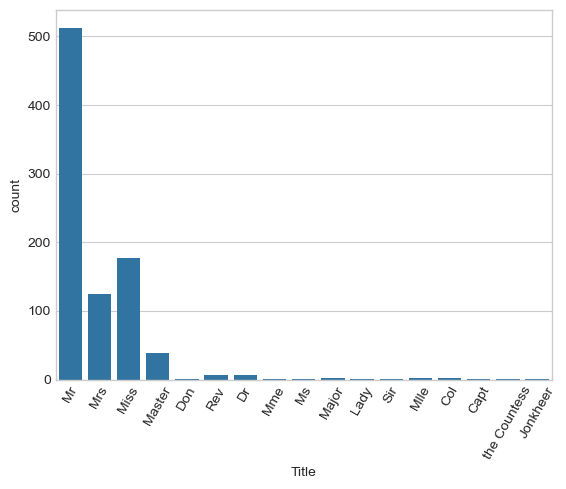

In [46]:
sns.countplot(x='Title',data=trainDF)
plt.xticks(rotation=60)
plt.show()

In [47]:
print(trainDF[trainDF['Title']=='Jonkheer'])

     PassengerId  Survived  Pclass                             Name   Sex  \
814          823         0       1  Reuchlin, Jonkheer. John George  male   

      Age  SibSp  Parch Ticket  Fare Cabin Embarked  SexEncoded     Title  
814  38.0      0      0  19972   0.0   NaN        S           0  Jonkheer  


In [48]:
#Convert to categorical
trainDF['Title']=trainDF['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Don','Dona'],'other')
trainDF['Title']=[0 if i=='Master' else 1 if i=='Miss' or i=='Ms' or i=='Mlle' or i=='Mrs' else 2 if i=='Mr' else 3 for i in trainDF['Title']]
trainDF['Title'].head(10)

0    2
1    1
2    1
3    1
4    2
5    2
6    2
7    0
8    1
9    1
Name: Title, dtype: int64

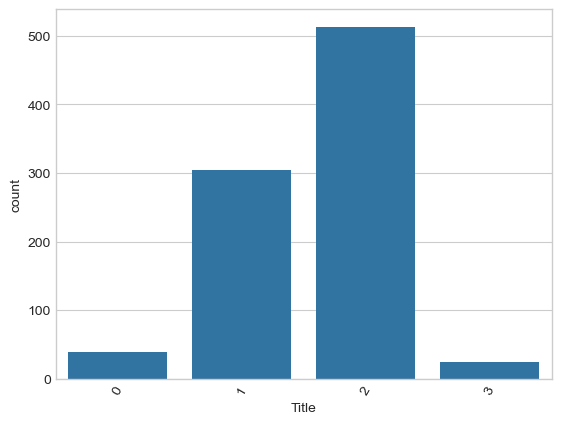

In [49]:
sns.countplot(x='Title',data=trainDF)
plt.xticks(rotation=60)
plt.show()

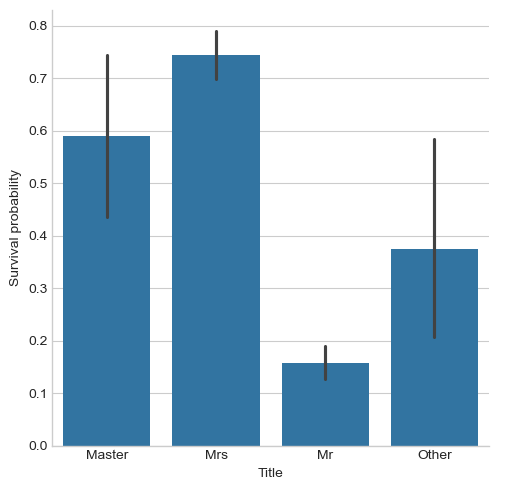

In [50]:
gr = sns.catplot(x='Title',y='Survived',data=trainDF,kind='bar')
gr.set_xticklabels(['Master','Mrs','Mr','Other'])
gr.set_ylabels('Survival probability')
plt.show()

In [51]:
trainDF.drop(labels=['Name'],axis=1,inplace=True)

In [52]:
trainDF.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexEncoded,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,2


In [53]:
# use "get_dummies" to convert numeric 'Title' values into categories
trainDF=pd.get_dummies(trainDF,columns=['Title'])
trainDF.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexEncoded,Title_0,Title_1,Title_2,Title_3
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,False,False,True,False
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,False,True,False,False
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1,False,True,False,False
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,False,False,True,False


In [54]:
trainDF.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexEncoded,Title_0,Title_1,Title_2,Title_3
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,False,False,True,False
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,False,True,False,False
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1,False,True,False,False
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,False,False,True,False


In [55]:
trainDF['Fsize']=trainDF['SibSp']+trainDF['Parch']+1

In [56]:
trainDF.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexEncoded,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,False,False,True,False,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,True,False,False,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,False,True,False,False,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1,False,True,False,False,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,False,False,True,False,1


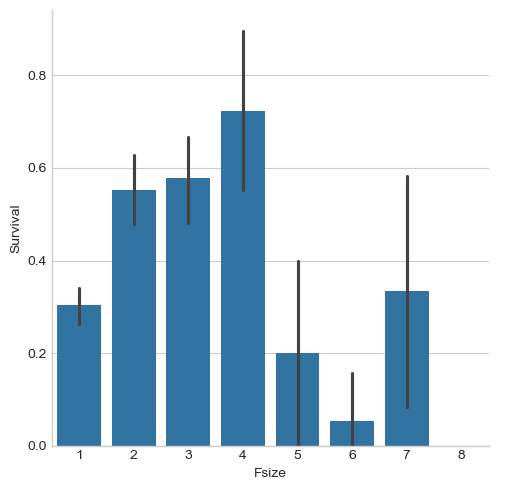

In [57]:
gu = sns.catplot(x='Fsize',y='Survived',data=trainDF,kind='bar')
gu.set_ylabels('Survival')
plt.show()

In [58]:
trainDF['family_size']=[1 if i<5 else 0 for i in trainDF['Fsize']]
print(trainDF.head(10))

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   
5            6         0       3    male  26.0      0      0   
6            7         0       1    male  54.0      0      0   
7            8         0       3    male   2.0      3      1   
8            9         1       3  female  27.0      0      2   
9           10         1       2  female  14.0      1      0   

             Ticket     Fare Cabin Embarked  SexEncoded  Title_0  Title_1  \
0         A/5 21171   7.2500   NaN        S           0    False    False   
1          PC 17599  71.2833   C85        C           1    False     True   
2  STON/O2. 3101282   7.9250   NaN        S           1    False

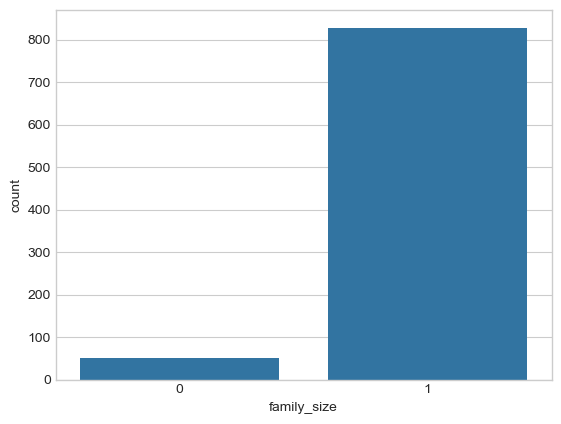

In [59]:
sns.countplot(x='family_size',data=trainDF)
plt.show()

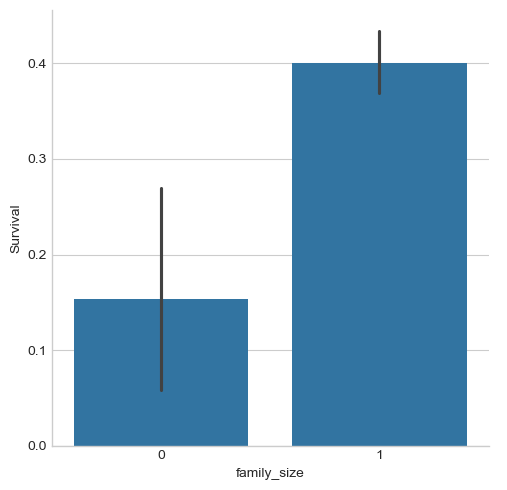

In [60]:
ga=sns.catplot(x='family_size',y='Survived',data=trainDF,kind='bar')
ga.set_ylabels('Survival')
plt.show()

In [61]:
trainDF=pd.get_dummies(trainDF,columns=['family_size'])
trainDF.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexEncoded,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,False,False,True,False,2,False,True
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,True,False,False,2,False,True
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,False,True,False,False,1,False,True
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1,False,True,False,False,2,False,True
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,False,False,True,False,1,False,True


In [62]:
trainDF['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

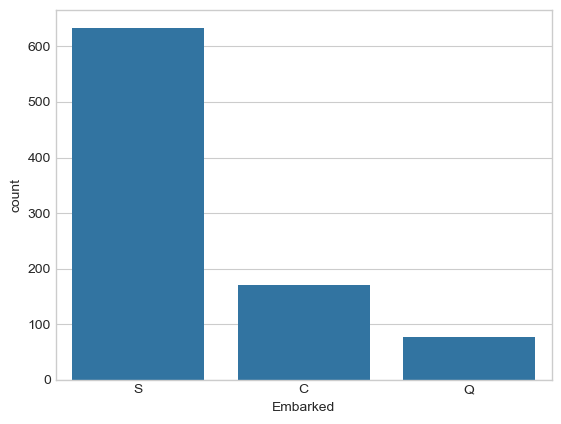

In [63]:
sns.countplot(x='Embarked',data=trainDF)
plt.show()

In [64]:
trainDF= pd.get_dummies(trainDF,columns=['Embarked'])
trainDF.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,...,False,False,True,False,2,False,True,False,False,True
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,...,False,True,False,False,2,False,True,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,False,True,False,False,1,False,True,False,False,True
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,...,False,True,False,False,2,False,True,False,False,True
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,...,False,False,True,False,1,False,True,False,False,True


In [65]:
trainDF['Ticket'].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [66]:
a = 'A/5. 2151'
a.replace('.','').replace('/','').strip().split(' ')[0]

'A5'

In [67]:
tickets = []
for i in list(trainDF['Ticket']):
    if not i.isdigit():
        tickets.append(i.replace('.','').replace('/','').strip().split(' ')[0])
    else:
        tickets.append('x')
trainDF['Ticket']=tickets

In [68]:
trainDF['Ticket'].head(20)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object

In [69]:
trainDF.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,A5,7.2500,NaN,...,False,False,True,False,2,False,True,False,False,True
1,2,1,1,female,38.0,1,0,PC,71.2833,C85,...,False,True,False,False,2,False,True,True,False,False
2,3,1,3,female,26.0,0,0,STONO2,7.9250,NaN,...,False,True,False,False,1,False,True,False,False,True
3,4,1,1,female,35.0,1,0,x,53.1000,C123,...,False,True,False,False,2,False,True,False,False,True
4,5,0,3,male,35.0,0,0,x,8.0500,NaN,...,False,False,True,False,1,False,True,False,False,True


In [70]:
trainDF=pd.get_dummies(trainDF,columns=['Ticket'],prefix='T')
trainDF.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,SexEncoded,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x
0,1,0,3,male,22.0,1,0,7.2500,NaN,0,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,female,38.0,1,0,71.2833,C85,1,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,female,26.0,0,0,7.9250,NaN,1,...,False,False,False,False,False,True,False,False,False,False
3,4,1,1,female,35.0,1,0,53.1000,C123,1,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,male,35.0,0,0,8.0500,NaN,0,...,False,False,False,False,False,False,False,False,False,True
5,6,0,3,male,26.0,0,0,8.4583,NaN,0,...,False,False,False,False,False,False,False,False,False,True
6,7,0,1,male,54.0,0,0,51.8625,E46,0,...,False,False,False,False,False,False,False,False,False,True
7,8,0,3,male,2.0,3,1,21.0750,NaN,0,...,False,False,False,False,False,False,False,False,False,True
8,9,1,3,female,27.0,0,2,11.1333,NaN,1,...,False,False,False,False,False,False,False,False,False,True
9,10,1,2,female,14.0,1,0,30.0708,NaN,1,...,False,False,False,False,False,False,False,False,False,True


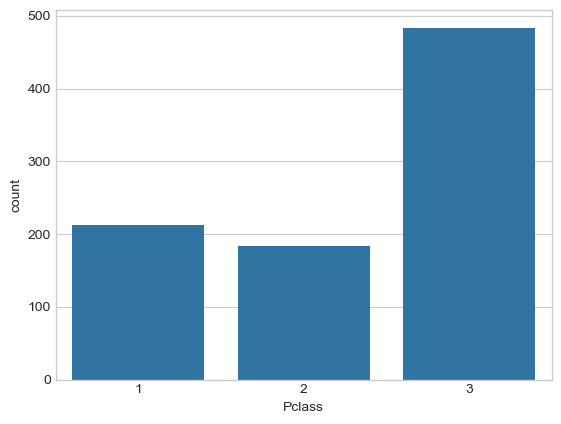

In [71]:
sns.countplot(x='Pclass',data=trainDF)
plt.show()

In [72]:
trainDF['Pclass']=trainDF['Pclass'].astype('category')
trainDF=pd.get_dummies(trainDF,columns=['Pclass'])
trainDF.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,SexEncoded,Title_0,...,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0,male,22.0,1,0,7.2500,NaN,0,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,female,38.0,1,0,71.2833,C85,1,False,...,False,False,False,False,False,False,False,True,False,False
2,3,1,female,26.0,0,0,7.9250,NaN,1,False,...,False,False,True,False,False,False,False,False,False,True
3,4,1,female,35.0,1,0,53.1000,C123,1,False,...,False,False,False,False,False,False,True,True,False,False
4,5,0,male,35.0,0,0,8.0500,NaN,0,False,...,False,False,False,False,False,False,True,False,False,True


In [73]:
trainDF['Sex']=trainDF['Sex'].astype('category')
trainDF = pd.get_dummies(trainDF,columns=['Sex'])
trainDF.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,SexEncoded,Title_0,Title_1,...,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,22.0,1,0,7.2500,NaN,0,False,False,...,False,False,False,False,False,False,False,True,False,True
1,2,1,38.0,1,0,71.2833,C85,1,False,True,...,False,False,False,False,False,True,False,False,True,False
2,3,1,26.0,0,0,7.9250,NaN,1,False,True,...,True,False,False,False,False,False,False,True,True,False
3,4,1,35.0,1,0,53.1000,C123,1,False,True,...,False,False,False,False,True,True,False,False,True,False
4,5,0,35.0,0,0,8.0500,NaN,0,False,False,...,False,False,False,False,True,False,False,True,False,True


In [74]:
trainDF.drop(labels=['PassengerId','Cabin'],axis=1,inplace=True)

In [75]:
trainDF.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'SexEncoded', 'Title_0',
       'Title_1', 'Title_2', 'Title_3', 'Fsize', 'family_size_0',
       'family_size_1', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A4',
       'T_A5', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC', 'T_Fa',
       'T_LINE', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA4', 'T_SCAH', 'T_SCOW',
       'T_SCPARIS', 'T_SCParis', 'T_SOC', 'T_SOP', 'T_SOPP', 'T_SOTONO2',
       'T_SOTONOQ', 'T_SP', 'T_STONO', 'T_STONO2', 'T_SWPP', 'T_WC', 'T_WEP',
       'T_x', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object')

In [76]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [77]:
train =trainDF[:trainDF_len]
xTrain=train.drop(labels='Survived',axis=1)
yTrain=train['Survived']
xTrain,xTest,yTrain,yTest=train_test_split(xTrain,yTrain,test_size=0.33,random_state=42)
print('xEgitim:',len(xTrain))
print('xTest:',len(xTest))
print('yEgitim:',len(yTrain))
print('yTest:',len(yTest))

xEgitim: 590
xTest: 291
yEgitim: 590
yTest: 291


In [78]:
logReg=LogisticRegression()
logReg.fit(xTrain,yTrain)
accLogTrain=round(logReg.score(xTrain,yTrain)*100,2)
accLogTest=round(logReg.score(xTest,yTest)*100,2)
print('Training Accuracy: {}'.format(accLogTrain))
print('Testing Accuracy: {}'.format(accLogTest))

Training Accuracy: 83.39
Testing Accuracy: 81.1


In [79]:
classifier=[DecisionTreeClassifier(random_state=42),
            SVC(random_state=42,
                probability=True),
            RandomForestClassifier(random_state=42),
            LogisticRegression(random_state=42),
            KNeighborsClassifier()]
dtParamGrid={'min_samples_split':range(10,500,20),
    'max_depth':range(1,20,2)}
svcParamGrid={'kernel':['rbf'],
              'gamma':[0.001,0.01,0.1,1],
              'C':[1,10,50,100,200,300,1000]}
rfParamGrid={'max_features':[1,3,10],
             'min_samples_split':[2,3,10],
             'min_samples_leaf':[1,3,10],
             'bootstrap':[False],
             'n_estimators':[100,300],
             'criterion':['gini']}
logRegParamGrid={'C':np.logspace(-3,3,7),
                'penalty':['l1','l2']}
knnParamGrid={'n_neighbors':np.linspace(1,19,10,dtype=int).tolist(),
             'weights':['uniform','distance'],
             'metric':['eucledian','manhattan']}
classifierParam=[dtParamGrid,
                 svcParamGrid,
                 rfParamGrid,
                 logRegParamGrid,
                 knnParamGrid]

In [80]:
cvResult=[]
bestEstimators=[]
for i in range(len(classifier)):
    clf=GridSearchCV(classifier[i],param_grid=classifierParam[i],cv=StratifiedKFold(n_splits=10),scoring='accuracy',n_jobs=-1,verbose=1)
    clf.fit(xTrain,yTrain)
    cvResult.append(clf.best_score_)
    bestEstimators.append(clf.best_estimator_)
    print(cvResult[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8355932203389831
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.7966101694915253
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.840677966101695
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.8152542372881356
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.776271186440678


In [81]:
cvResults=pd.DataFrame({'Cross Validation Accuracy Means':cvResult,'ML Models':['DecisionTreeClassifier','SVM',
                       'RandomForestClassifier','LogisticRegression','KNeighborsRegression']})
cvResults

,Cross Validation Accuracy Means,ML Models
0,0.835593,DecisionTreeClassifier
1,0.796610,SVM
2,0.840678,RandomForestClassifier
3,0.815254,LogisticRegression
4,0.776271,KNeighborsRegression


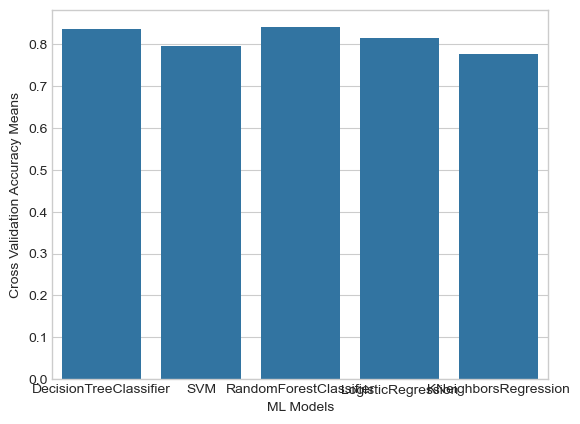

In [82]:
su = sns.barplot(cvResults,x='ML Models',y='Cross Validation Accuracy Means')

In [84]:
# Ensemble Modeling
votingC=VotingClassifier(estimators=[('dt',bestEstimators[0]),
                                     ('rfc',bestEstimators[1]),
                                     ('lr',bestEstimators[3])],
                                     voting='soft',n_jobs=-1)
votingC=votingC.fit(xTrain,yTrain)
print(accuracy_score(votingC.predict(xTest),yTest))

0.8213058419243986
